# Tutorial 5 - Example 2 

In [11]:
import numpy as np

#Create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1+0.3


In [2]:
import tensorflow as tf
#Create tensorflow structure start
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases

In [3]:
#Calculating the loss 
loss = tf.reduce_mean(tf.square(y-y_data))

#Gradient Descent to optimise the weights
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


## Initialisation

Once all variables are defined, they must be initialised!

In [4]:
init = tf.global_variables_initializer() #important


## Session 

Let's now try to minize this loss by running it through the network 201 times.

We'll also print out the loss every 20 steps. 

In [5]:
sess = tf.Session()

# Run the initializer 
sess.run(init)

# Minimize this loss 201 times
for step in range(201):
    sess.run(train)
    
    if step % 20 == 0: 
        print(step, sess.run(Weights), sess.run(biases))



0 [ 0.76987588] [-0.0989176]
20 [ 0.28089479] [ 0.20170276]
40 [ 0.14780407] [ 0.27402353]
60 [ 0.11263292] [ 0.29313534]
80 [ 0.10333844] [ 0.29818591]
100 [ 0.10088223] [ 0.29952061]
120 [ 0.10023314] [ 0.29987332]
140 [ 0.10006163] [ 0.29996654]
160 [ 0.10001628] [ 0.29999116]
180 [ 0.10000429] [ 0.29999769]
200 [ 0.10000113] [ 0.29999939]


# Tutorial 6 - tf.Session

In [7]:
import tensorflow as tf

matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                        [2]])

product = tf.matmul(matrix1, matrix2) # similar to numpy's np.dot(m1,m2) method

Let's run this dot product operation: 

In [8]:
# method 1 
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[12]]


Another way to do this to use the context manager: 

In [10]:
# Method 2 
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


# Tutorial 7 - tf.Variable

Let's create a variable and give it a name. 

In [1]:
import tensorflow as tf

state = tf.Variable(0, name="counter")
print(state.name)

counter:0


Next we'll create a constant and make an operation to add the constant to the state.

We'll also make a update operation to assign the new value to as the value of the state. 

In [2]:
one = tf.constant(1)
new_value = tf.add(state, one)

# To assign the new value to the variable, we need to use the tf.assign() method 
update = tf.assign(state, new_value)

# REMEMBER to initialize all your variables 
init = tf.global_variables_initializer()

Let's run this operation in a session and see what happens. 

In [5]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


# Tutorial 8 - Placeholders

Reference: https://www.tensorflow.org/api_docs/python/tf/placeholder 

Placeholders are similar to variables. 

"Inserts a placeholder for a tensor that will be always fed."


Use tf.placeholder() to do this. We can optionally pass in a shape as well. 


In [1]:
import tensorflow as tf 

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

Let's run this session now. Here we can see the inputs are fed into the operation via a dictionary of the parameter: feed_dict 

In [2]:
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: [7.], input2:[2.]}))

[ 14.]


# Tutorial 9 - Activation Function

Reference: 
https://www.tensorflow.org/api_guides/python/nn 

Several Activation functions include: 

    - tf.nn.relu
    - tf.nn.relu6
    - tf.nn.elu
    - tf.nn.softplus
    - tf.nn.softsign
    - tf.nn.dropout

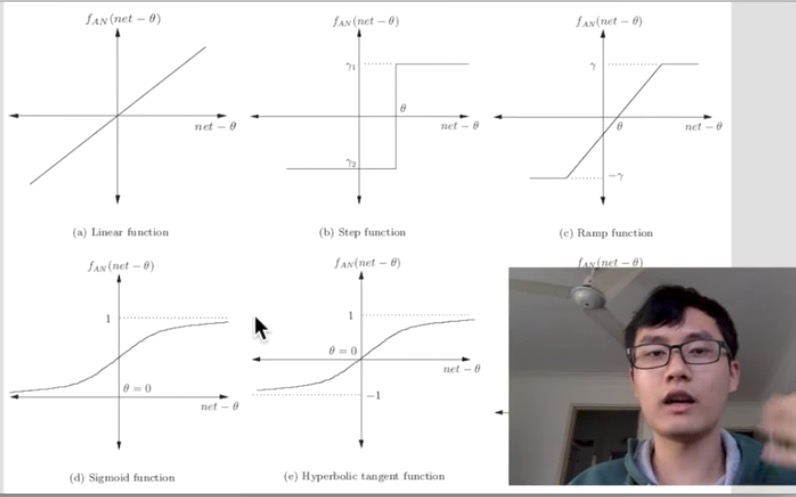

# Tutorial 10 def add_layer()

Reference: 

We'll create a new function, "add_layers", which adds any layer. 

The arguments include: 
- inputs => the information processed from the previous sprint 
- in_size => the size of the input. How many hidden neurons were present in the last layer. 
- out_size => The number of neurons of outgoing layer. 
- activation_function => The activation function choice. Default set to None.

In [1]:
def add_layers(inputs, in_size, out_size, activation_function):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    

    return outputs

##### The weights and biases are initialized. 

To give an idea of how the weights and biases appear: 

In [5]:
input_size = 4
output_size = 5 

w = tf.random_normal([input_size, output_size])
b = tf.zeros([1,output_size]) + 0.1

with tf.Session() as sess:
    print("Printing the initialised weights:\n", sess.run(w))
    print("\nPrinting the initialized biases:\n", sess.run(b))
    

Printing the initialised weights:
 [[ 1.51721525  0.66396117  0.06930449  0.67450422 -0.21912768]
 [-0.77748412 -0.10495571  0.65972644  2.56401443 -0.24661067]
 [ 1.14105701 -1.82277524 -0.11318437  0.52385676  0.10585456]
 [ 0.56906253 -0.23450409  0.89679533 -1.53540957  1.52614915]]

Printing the initialized biases:
 [[ 0.1  0.1  0.1  0.1  0.1]]


# Tutorial 11 - Example 3 - Build a network

References: 

The linspace function creates values in an interval. 

So there will be 300 values between -1 and 1. 

We'll add some noise to the data set. 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1,300)[:, np.newaxis] 
noise = np.random.normal(0,0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise 


# plt.scatter(x_data, y_data)
# plt.show()

- None here means all possible number of samples is excepted. 
- As there is only 1 feature, we place 1 as the second element.

In [3]:
# Define the placeholder for inputs to the network

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])


- For the hidden layer, we'll use relu as the activation function. 
- For the output layer, the activation function is set to None as this is a regression problem. 

In [4]:
# Add hidden layer 
l1 = add_layers(xs, 1, 10, activation_function=tf.nn.relu)

# Add output layer 
prediction = add_layers(l1, 10, 1, activation_function=None)

We'll using the GradientDescentOptimizer with a learning rate of 0.1

In [5]:
# the error between prediction and real data

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Lastly, let's initialize all our variables

In [6]:
# important step
init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    print("Beginning training: \n")
    for i in range(1000):
        #training
        sess.run(train_step,feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            # to see step improvement
            print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))


Beginning training: 

0.724214
0.0166948
0.00680977
0.00550714
0.00482411
0.00437342
0.00399958
0.00372269
0.00356325
0.0034525
0.00334779
0.00327651
0.00321408
0.00315594
0.00311617
0.00307295
0.00304045
0.00302064
0.0029973
0.0029656


# Tutorial 12 - Visualize the results

references: 
- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html

Use the add_subplot() method, with 1 row, 1 column and 1 figure. 

HINT: The red line does not show on the graph. This may only work.  

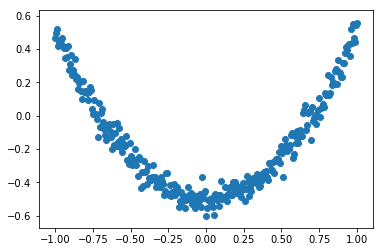

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion() # This enables interactive mode
plt.show()

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        #training
        sess.run(train_step,feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            # to visualise the result and improvement
            try: 
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs:x_data})
            # plot the prediction
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)
    


# Tutorial 13 - Optimisers

References: 
- https://www.tensorflow.org/api_docs/python/tf/train 

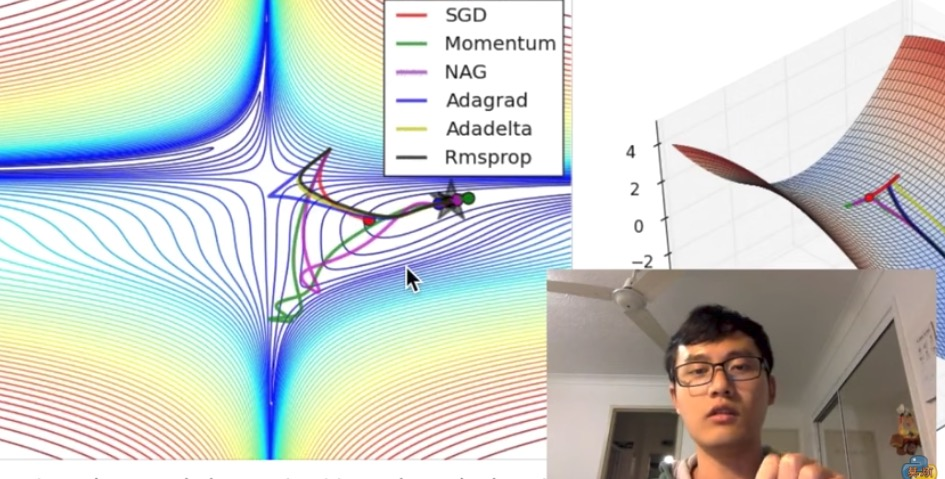

# Tutorial 14 - Visualisation Tensorboard 1

References: 

By using the tf.name_scope() method, we can add the name for certain sections which can be later viewed in the graphs section of the tensorboard interface. 

In [1]:
def add_layers(inputs, in_size, out_size, activation_function):
    with tf.name_scope("layers"):
        with tf.name_scope("weights"):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name="W")
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name="b")
            
        with tf.name_scope("operation"):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases

        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)


        return outputs

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1,300)[:, np.newaxis] 
noise = np.random.normal(0,0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise 

with tf.name_scope("inputs"):
    xs = tf.placeholder(tf.float32, [None, 1], name="x_inputs")
    ys = tf.placeholder(tf.float32, [None, 1], name="y_inputs")
    
# Add hidden layer 
l1 = add_layers(xs, 1, 10, activation_function=tf.nn.relu)

# Add output layer 
prediction = add_layers(l1, 10, 1, activation_function=None)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))

with tf.name_scope("train"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
        
with tf.Session() as sess:
    writer = tf.summary.FileWriter("logs/", sess.graph)

    sess.run(init)

The results can be shown as such:
    
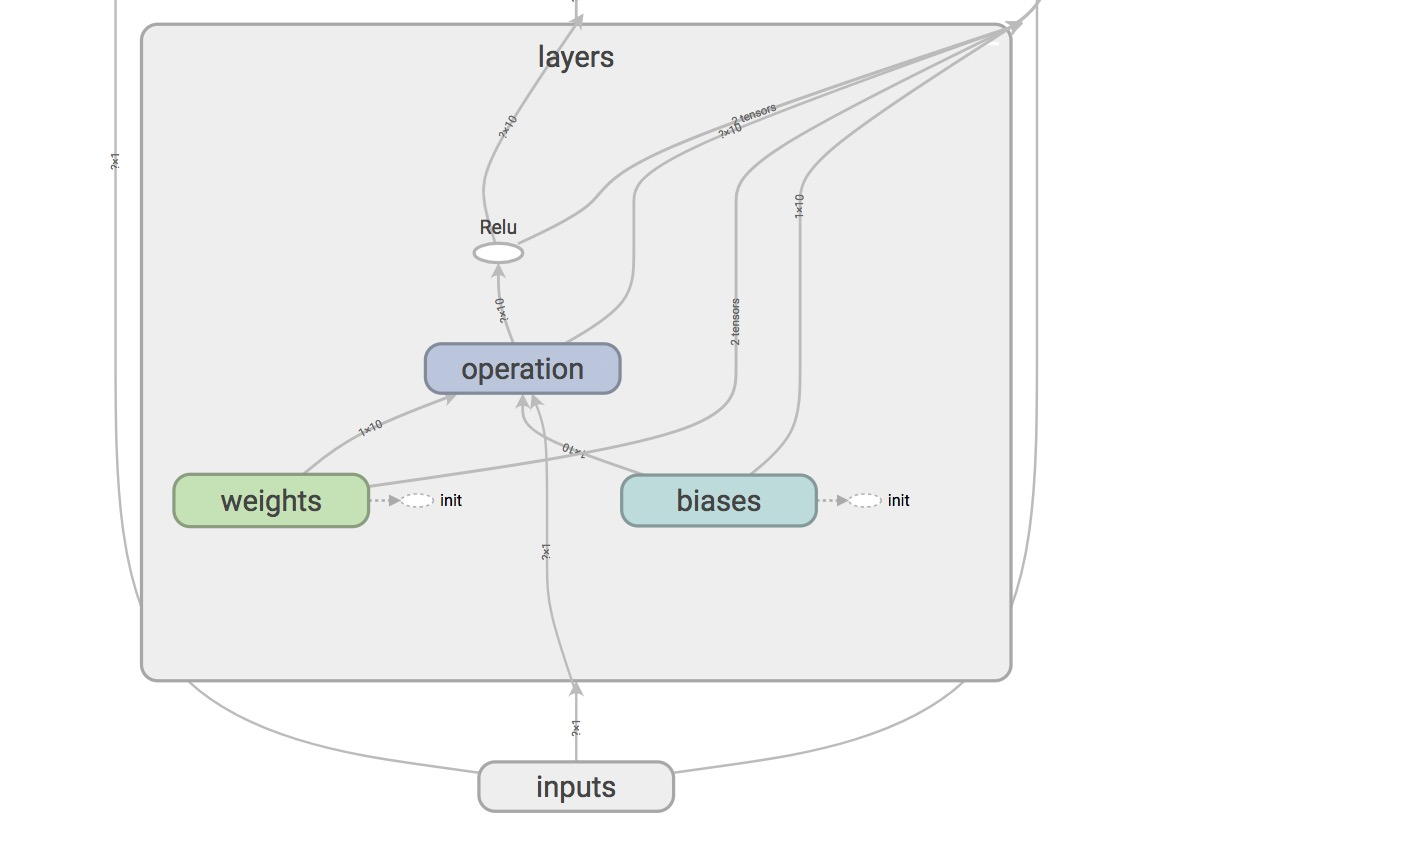

# Tutorial 15 - Visualisation Tensorboard 2 

References: 


- Added new argument: n_layer
- Line 6: Added histogram_summary for weights
- Line 9: Added history_summary for biases
- Line 19: Added history_summary for outputs


We'll add some historgrams using the **tf.summary.histogram()** method 

In [1]:
def add_layers(inputs, in_size, out_size, n_layer, activation_function):
    layer_name = "layer%s" % n_layer
    with tf.name_scope("layers"):
        with tf.name_scope("weights"):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name="W")
            tf.summary.histogram(layer_name + "/weights", Weights)
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name="b")
            tf.summary.histogram(layer_name + "/biases", biases)
            
        with tf.name_scope("operation"):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases

        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        
        tf.summary.histogram(layer_name + "/outputs", outputs)

        return outputs

Next, we'll add a few summaries and merge them: 

- Line 22 - We'll create a scalar graph of the losses. 
- Line 31 - We must all use the tf.summary.merge_all() method merges all the summaries together.
- Line 39-40 - The merged operation is ran after every 50 iterations, the result of which is written to the logs file.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1,300)[:, np.newaxis] 
noise = np.random.normal(0,0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise 

with tf.name_scope("inputs"):
    xs = tf.placeholder(tf.float32, [None, 1], name="x_inputs")
    ys = tf.placeholder(tf.float32, [None, 1], name="y_inputs")
    
# Add hidden layer 
l1 = add_layers(xs, 1, 10, n_layer=1,activation_function=tf.nn.relu)

# Add output layer 
prediction = add_layers(l1, 10, 1, n_layer=2,activation_function=None)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))

    tf.summary.scalar("loss", loss) 
    
with tf.name_scope("train"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
        
with tf.Session() as sess:

    merged = tf.summary.merge_all()
    
    writer = tf.summary.FileWriter("logs/", sess.graph)
    sess.run(init)
    
    for i in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            result = sess.run(merged, feed_dict={xs:x_data, ys:y_data})
            writer.add_summary(result, i)

The graphs will be plot on tensorboard as such:

Scalar: 

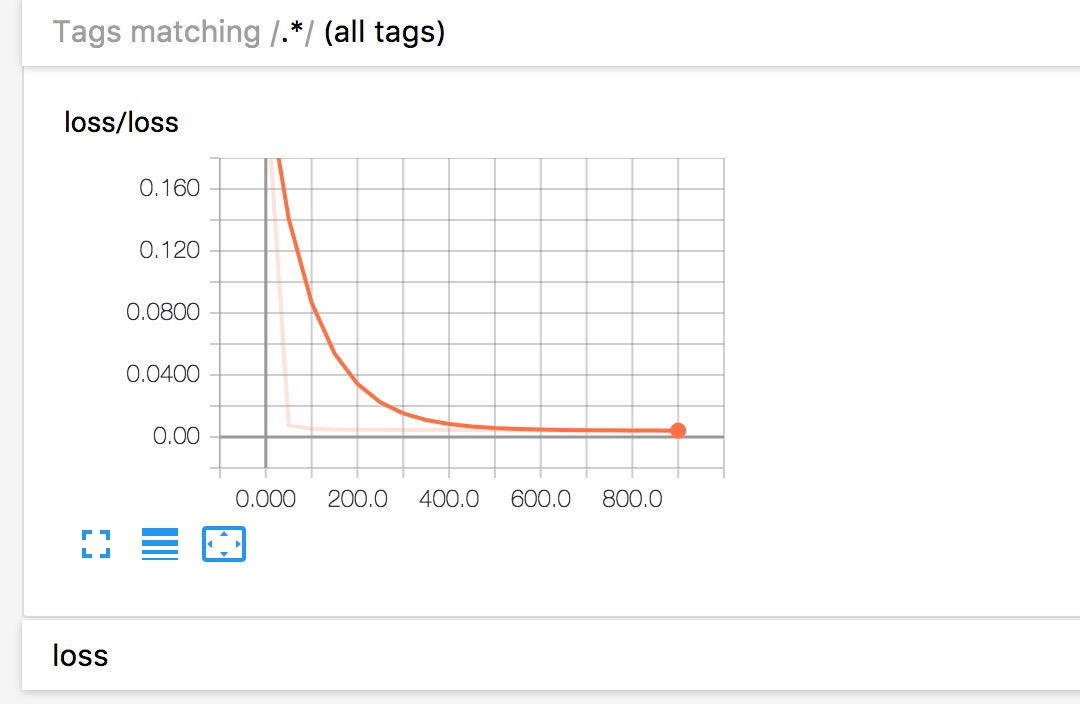


Distributions:
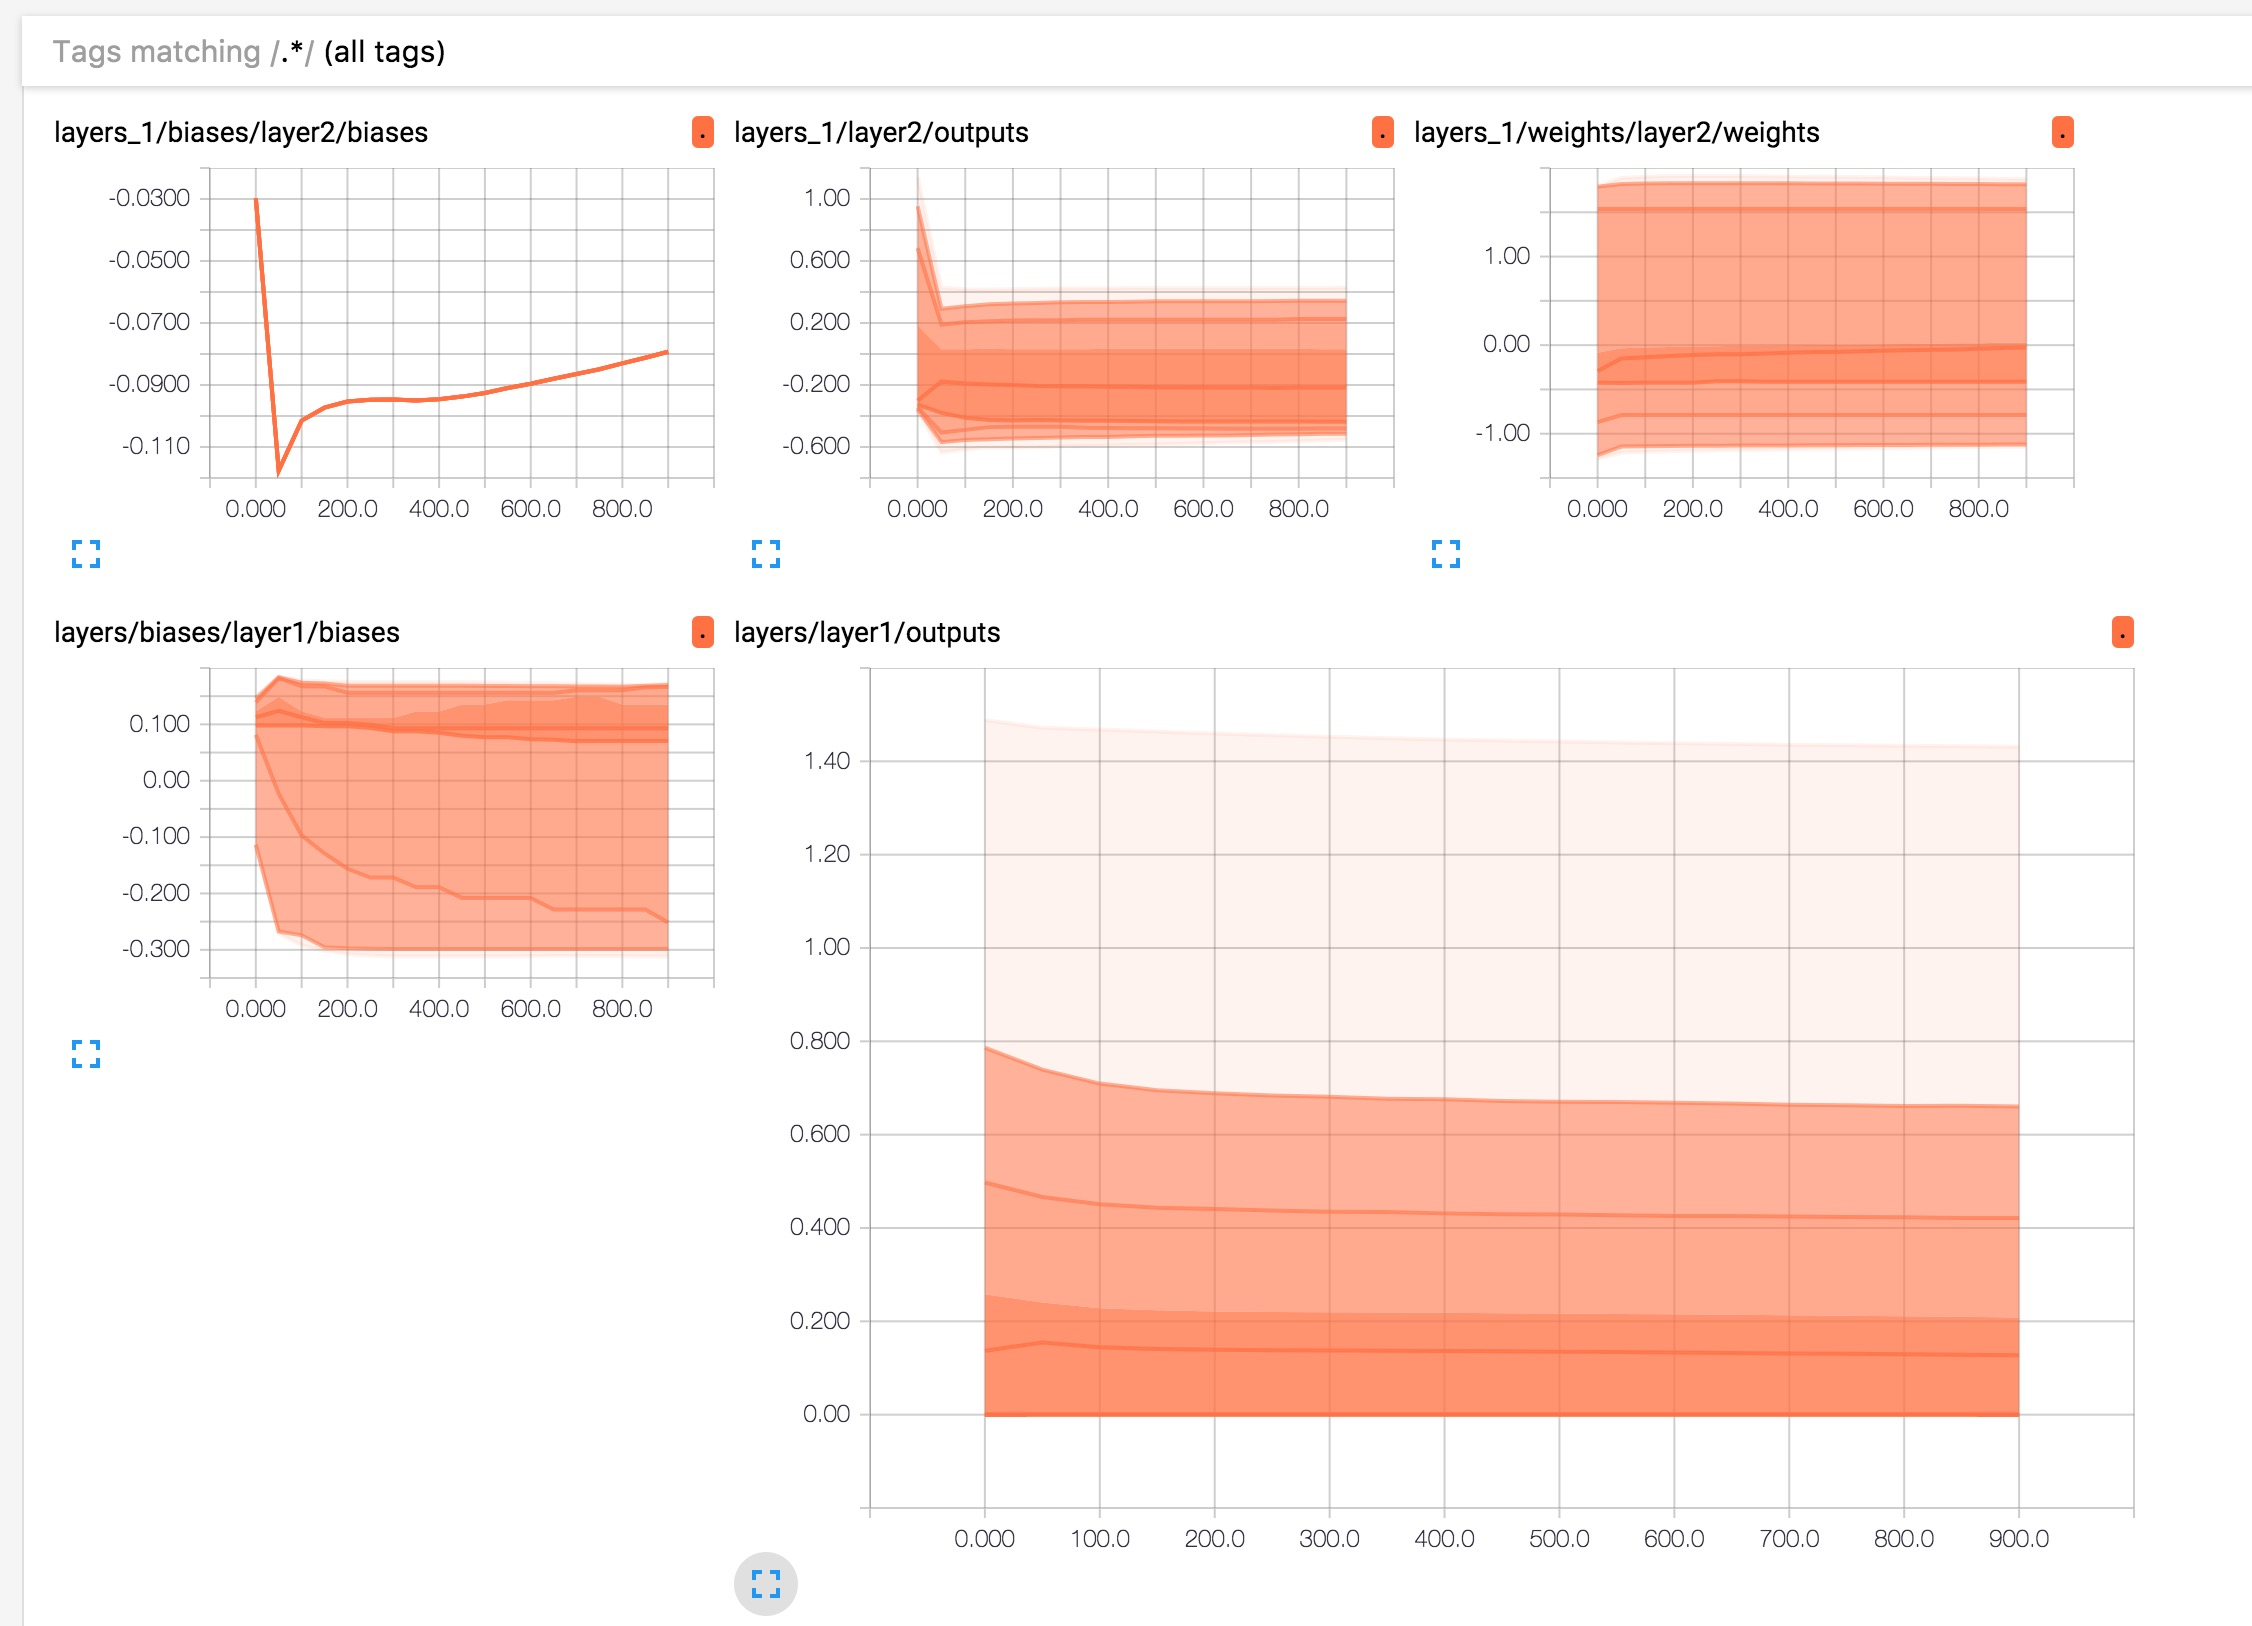

# Tutorial 16 - Classification

References:
- https://www.tensorflow.org/get_started/mnist/beginners

This tutorial demonstrates how to make a neural network to classify different digits. Again, we will use the add_layer method(). This time, we will use **cross entropy** to calculate the error.

In [1]:
def add_layer(inputs, in_size, out_size, activation_function):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs

We can see here that the number is represented as numbers. 

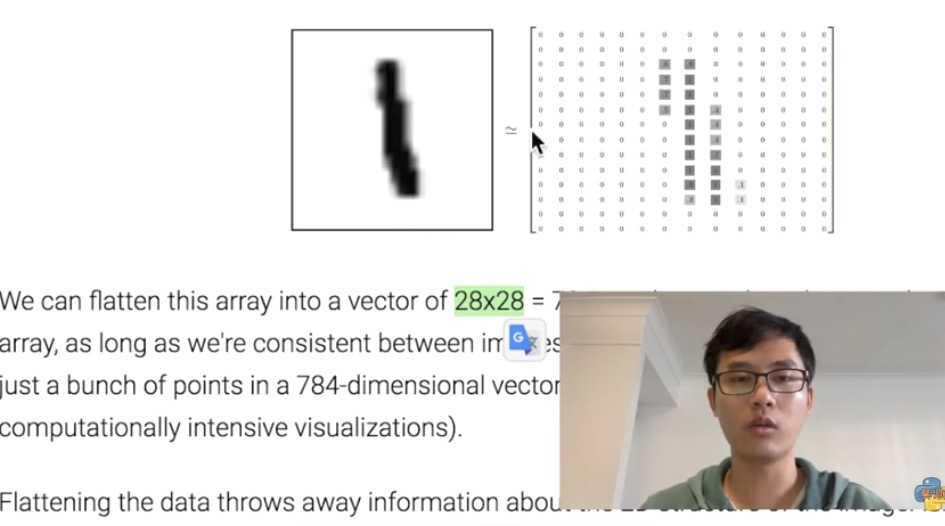

The output is will actually be an array as such: 

[0,0,0,1,0,0,0,0,0,0]

In this case, the number **3** was identified by the NN.

- This time, we'll only have one layer, which is the output layer. Therefore, we'll use the softmax function.
- There are around 55,000 pieces of data, so we'll just grab batches of 100.
- We'll feed in these batches in the sess.run()

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 10])

# Add output layer 
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

# The error calculation between prediction and real data 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction),
                                             reduction_indices=[1])) #the cross entropy loss calculation.

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs:v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs:v_xs,ys:v_ys})
    return result
    
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)        
    sess.run(train_step, feed_dict={xs: batch_xs, ys:batch_ys})

    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels)) 


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.0728
0.6241
0.7415
0.7837
0.8047
0.8201
0.8324
0.8409
0.8452
0.8501
0.8576
0.8557
0.8599
0.8637
0.8648
0.8698
0.8716
0.8724
0.8752
0.8749


# Tutorial 17 - Regularization dropout

References:
- https://www.tensorflow.org/api_docs/python/tf/nn/dropout 

We need to add the dropout function before the activated value in the **add_layer()** method. This is accomplished using the **tf.nn.dropout()** method as shown in **line 19**.

As a result, we'll also need to pass in a percent of probabilities to keep. We'll pass this in as a placeholder named **keep_prob**

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 

# load data 
digits = load_digits()
X = digits.data
y = digits.target 
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

def add_layer(inputs, in_size, out_size, layer_name,activation_function):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    tf.summary.histogram(layer_name+'/outputs', outputs)
    return outputs

# define placeholders for inputs to the network
keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 64]) # 8x8 
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer 
l1 = add_layer(xs, 64,50,'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

# the loss between the prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction),
                                             reduction_indices=[1])) #the cross entropy loss calculation.

tf.summary.scalar('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()

# Summary writer goes in here
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer = tf.summary.FileWriter("logs/test", sess.graph)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(500):
    sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: 0.5})
    
    if i % 50 == 0:
        # record loss
        train_result = sess.run(merged, feed_dict={xs: X_train, ys: y_train, keep_prob: 1.0})
        test_result = sess.run(merged, feed_dict={xs: X_test, ys: y_test, keep_prob: 1.0})
        train_writer.add_summary(train_result, i)
        test_writer.add_summary(test_result, i)

We can now see the loss in the test curve is closer to that of the training: 

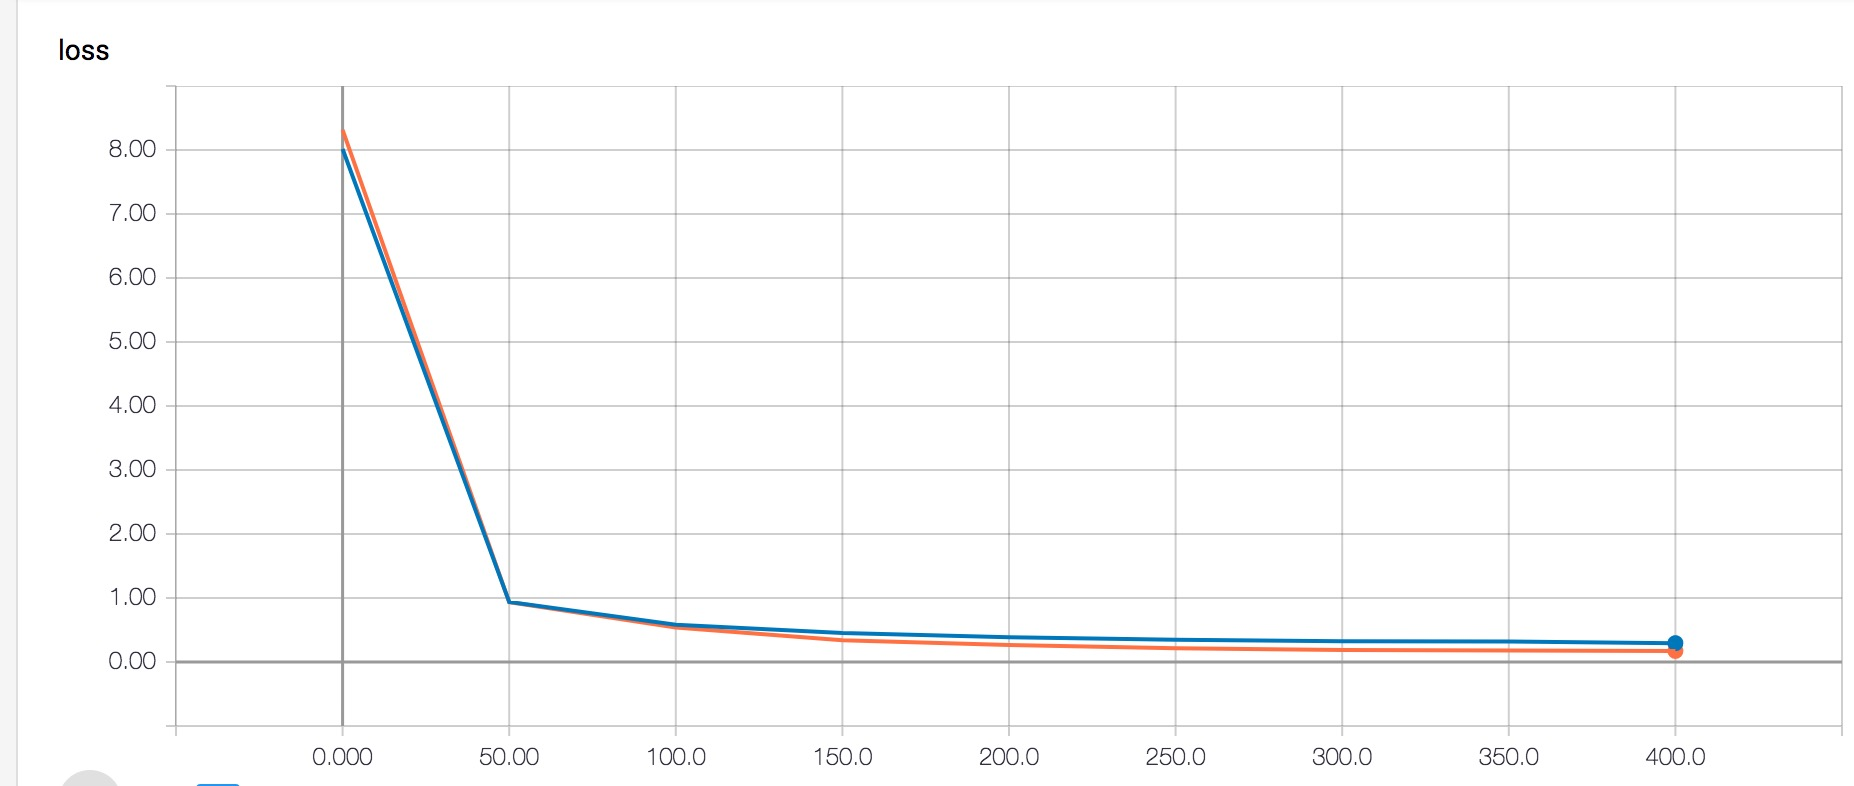

# Tutorial 18 - Saver 

References: 
- https://www.tensorflow.org/api_docs/python/tf/train/Saver 
- https://jhui.github.io/2017/03/08/TensorFlow-variable-sharing/

We use the **tf.train.Saver()** method to save models.

The **Saver** cannot save the entire structure, it can only save the weights and biases. 

Using the .save() method of the Saver() constructor class:
- 1st arg: the session
- 2nd arg: the save path 


In [1]:
import tensorflow as tf 

# save to file
# Remember to define the same dtype and shape when restoring
W = tf.Variable([[1.,2.,3.], [1.,2.,3.]], dtype=tf.float32, name="weights")
b = tf.Variable([1.,2.,3.], dtype=tf.float32, name="biases")

init = tf.global_variables_initializer()

saver = tf.train.Saver(sharded=False)
with tf.Session() as sess:
    sess.run(init)
    save_path = saver.save(sess, "box/save_net.ckpt")
    print("Save to path: ", save_path)


Save to path:  box/save_net.ckpt


If we look at the 'my_net' folder:
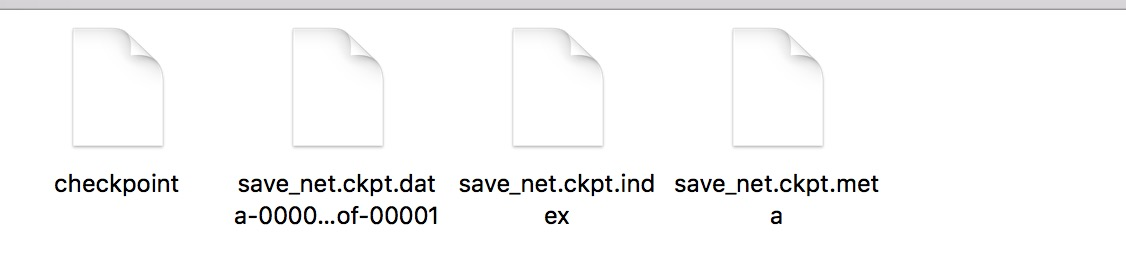

** Remember! ** If we want to restore our variables, we need to redefine the same shape and same dtype for our variables 

#### ERROR WITH JUPYTER NOTEBOOK!
There is an error with restoring with jupyter as of present. 

In [2]:
import tensorflow as tf

W = tf.Variable(tf.zeros([2,3]), dtype=tf.float32, name="weights")
b = tf.Variable(tf.zeros([3]), dtype=tf.float32, name="biases")

# no need for init step 
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "box/save_net.ckpt")
    print("weights:", sess.run(W))
    print("biases: ", sess.run(b))
    

INFO:tensorflow:Restoring parameters from box/save_net.ckpt


NotFoundError: Key weights_1 not found in checkpoint
	 [[Node: save_1/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_1/Const_0_0, save_1/RestoreV2_3/tensor_names, save_1/RestoreV2_3/shape_and_slices)]]

Caused by op 'save_1/RestoreV2_3', defined at:
  File "/Users/kch31/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kch31/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-dbc7bc62c677>", line 7, in <module>
    saver = tf.train.Saver()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key weights_1 not found in checkpoint
	 [[Node: save_1/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_1/Const_0_0, save_1/RestoreV2_3/tensor_names, save_1/RestoreV2_3/shape_and_slices)]]


# Tutorial 19 - Convolutional Neural Network

References: 

Methods: 

In [1]:
import tensorflow as tf

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    # stride [1,x_movement,y_movemnt,1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME")

def max_pool_2x2(x):
    #stride [1,x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# define placeholder for inputs to network 
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1,28,28,1])


#Conv1 layer
W_conv1 = weight_variable([5,5,1,32]) # patch 5x5, in size 1, outsize 32 
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32

#Pooling layer 1 
h_pool1 = max_pool_2x2(h_conv1) #output size 14x14x32

#Convolutional layer 2 
W_conv2 = weight_variable([5,5,32,64]) # patch 5x5, in size 32, outsize 64 
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #output size 14x14x64

#Pooling layer 2 
h_pool2 = max_pool_2x2(h_conv2) #output size 7x7x64 

#fully connected layer 1 
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

#[n_samples, 7,7,64] --> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# output layer 
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# the loss between the prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction),
                                             reduction_indices=[1])) #the cross entropy loss calculation.
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver(sharded=False)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys, keep_prob:0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))

# Save variables 
save_path = saver.save(sess, "saved_models/model_18.ckpt")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.149
0.7698
0.8762
0.9078
0.9201
0.9266
0.9391
0.9417
0.9474
0.9507
0.9532
0.9561
0.957
0.9577
0.9613
0.9595
0.9654
0.9655
0.9699
0.9678
